### Simulated returns from snow under clouds: Signal spread
Another way we can identify surface returns is to look at how concentrated the photons in a return are.  This is (more or less) how the ATL06 locks onto the ground: It finds collections of photons that are too concentrated to be from a cloud.

The expected standard deviation of a collection of photons based on the expected detection count is:
$$\sigma(z)^2 = \sum_{z_i > z-W/2}^{z_i < z+W/2} \frac{P_i(z_i-z_c(z))^2}{P_{tot}(z)} $$
Here $z_c(z)$ is the centroid of the return probability within $\pm W/2$ of $z$, and $P_{tot}(z)$ is the integrated probability within $\pm W/2$ of $z$.

We can generate a function to calculate the windowed standard deviation from the expected number of photons:



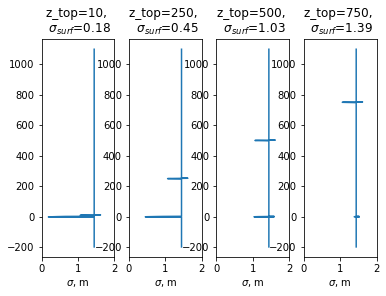

In [4]:
def window_sigma(z, P, W):
    sigma=np.zeros_like(P)+np.NaN
    for ii in range(P.size):
        els=np.abs(z-z[ii])<=W/2.
        Ptot=np.sum(P[els])
        if (Ptot == 0) or (np.sum(els) < 25):
            continue
        zctr=np.sum(P[els]*(z[els]))/Ptot
        sigma[ii]=np.sqrt(np.sum(P[els]*(z[els]-zctr)**2.)/Ptot)
    return sigma

N_BG=2.5e6/1.5e8*dz

fig=plt.figure()
for axes_ind, key in enumerate([10, 250, 500, 750]):
    fig.add_subplot(1, 4, axes_ind+1)
    sigma_profile=window_sigma(zc, P_save[key]+N_BG, 5)
    plt.plot(sigma_profile, zc)
    plt.gca().set_xlim([0, 2])
    sigma_surf=np.nanmin(sigma_profile[np.abs(zc< 10)])
    plt.title('z_top=%d, \n $\sigma_{surf}$=%2.2f' % (key, sigma_surf)) 
    plt.xlabel('$\sigma$, m')